In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
# Loading the 'Movies_final.csv' dataset into a DataFrame called 'movies'
movies = pd.read_csv('Movies_final.csv')

In [3]:
# Displaying the first few rows of the 'movies' dataset
movies.head()

,Title,Year,Interval,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,Holiday,Horror,Kids,Lgbtq+,Mystery,Romance,Sci-fi,War,family,thriller
0,Spider-Man: Across the Spider-Verse,2023,8400,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,The Angry Black Girl and Her Monster,2023,5520,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
2,Scare Package II: Rad Chad's Revenge,2022,5880,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,Based on a True Story,2005,4500,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Fast X,2023,8460,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Filtering movies with Interval value equal to 0
movies[movies.Interval==0]

,Title,Year,Interval,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,Holiday,Horror,Kids,Lgbtq+,Mystery,Romance,Sci-fi,War,family,thriller
74,Dune,2000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108,Moonlight,2021,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Dropping rows with index 74 and 108 from the 'movies' DataFrame
movies.drop([74,108],axis=0,inplace=True)

In [6]:
# Importing required modules for cosine similarity computation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Extracting the genre columns for cosine similarity computation
genre_columns = movies.iloc[:, 3:]  # Assumes genre columns start from the 4th column

# Computing the cosine similarity matrix
cosine_sim = cosine_similarity(genre_columns)

Enter a movie name: Ghosted


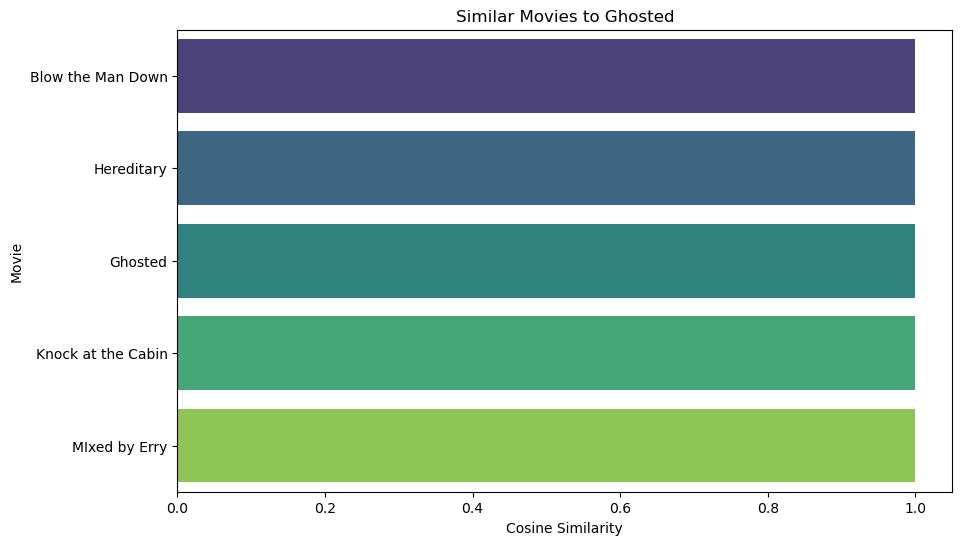

Similar movies: ['Blow the Man Down', 'Hereditary', 'Ghosted', 'Knock at the Cabin', 'MIxed by Erry']


In [7]:
# Define the movie recommendation function
def get_similar_movies(movie_name):
    movie_indices = movies[movies['Title'] == movie_name].index
    if len(movie_indices) == 0:
        return "Movie not found."

    movie_index = movie_indices[0]
    movie_similarities = cosine_sim[movie_index]
    similar_indices = movie_similarities.argsort()[:-6:-1]
    similar_movies = movies.loc[similar_indices, 'Title']

    # Create a DataFrame for visualization
    similar_movies_df = pd.DataFrame({'Movie': similar_movies, 'Similarity': movie_similarities[similar_indices]})

    # Plotting the cosine similarity scores
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Similarity', y='Movie', data=similar_movies_df, palette='viridis')
    plt.xlabel('Cosine Similarity')
    plt.ylabel('Movie')
    plt.title(f'Similar Movies to {movie_name}')
    plt.show()

    return similar_movies.tolist()

# Example usage
movie_name = input("Enter a movie name: ")
similar_movies = get_similar_movies(movie_name)
print("Similar movies:", similar_movies)